In [2]:
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load
diabetes = pd.read_csv('../../data/diabetes.csv')
print(diabetes['Outcome'].value_counts())

# data split
y = diabetes['Outcome']
X = diabetes.drop('Outcome', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

# model training
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

# predict
y_pred = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.3f}')

0    500
1    268
Name: Outcome, dtype: int64
[1]	valid_0's binary_logloss: 0.630031
[2]	valid_0's binary_logloss: 0.607335
[3]	valid_0's binary_logloss: 0.585795
[4]	valid_0's binary_logloss: 0.566393
[5]	valid_0's binary_logloss: 0.551676
[6]	valid_0's binary_logloss: 0.541892
[7]	valid_0's binary_logloss: 0.535487
[8]	valid_0's binary_logloss: 0.526912
[9]	valid_0's binary_logloss: 0.518037
[10]	valid_0's binary_logloss: 0.512287
[11]	valid_0's binary_logloss: 0.511588
[12]	valid_0's binary_logloss: 0.504413
[13]	valid_0's binary_logloss: 0.49867
[14]	valid_0's binary_logloss: 0.496196
[15]	valid_0's binary_logloss: 0.492987
[16]	valid_0's binary_logloss: 0.489374
[17]	valid_0's binary_logloss: 0.491211
[18]	valid_0's binary_logloss: 0.491578
[19]	valid_0's binary_logloss: 0.489177
[20]	valid_0's binary_logloss: 0.488728
[21]	valid_0's binary_logloss: 0.486497
[22]	valid_0's binary_logloss: 0.48802
[23]	valid_0's binary_logloss: 0.487214
[24]	valid_0's binary_logloss: 0.488736
[25]	

c:\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
# validation 추가해 split하기 
X_total, X_test, y_total, y_test = train_test_split(X, y, test_size=0.2, random_state=156)
X_train, X_val, y_train, y_val = train_test_split(X_total, y_total, test_size=0.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_train, y_train), (X_val, y_val)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.608227	valid_1's binary_logloss: 0.75939
[2]	training's binary_logloss: 0.590212	valid_1's binary_logloss: 0.737936
[3]	training's binary_logloss: 0.573528	valid_1's binary_logloss: 0.719131
[4]	training's binary_logloss: 0.558443	valid_1's binary_logloss: 0.701693
[5]	training's binary_logloss: 0.544642	valid_1's binary_logloss: 0.686725
[6]	training's binary_logloss: 0.531365	valid_1's binary_logloss: 0.673496
[7]	training's binary_logloss: 0.519321	valid_1's binary_logloss: 0.66408
[8]	training's binary_logloss: 0.507941	valid_1's binary_logloss: 0.652477
[9]	training's binary_logloss: 0.496987	valid_1's binary_logloss: 0.644359
[10]	training's binary_logloss: 0.486609	valid_1's binary_logloss: 0.638452
[11]	training's binary_logloss: 0.476449	valid_1's binary_logloss: 0.627798
[12]	training's binary_logloss: 0.466846	valid_1's binary_logloss: 0.620406
[13]	training's binary_logloss: 0.457987	valid_1's binary_logloss: 0.61127
[14]	training's binary_l

c:\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [7]:
print(get_clf_eval(y_test, preds, pred_proba))

오차 행렬
[[86 11]
 [25 32]]
정확도: 0.7662, 정밀도: 0.7442, 재현율: 0.5614,    F1: 0.6400, AUC:0.8242
None


### feature importance

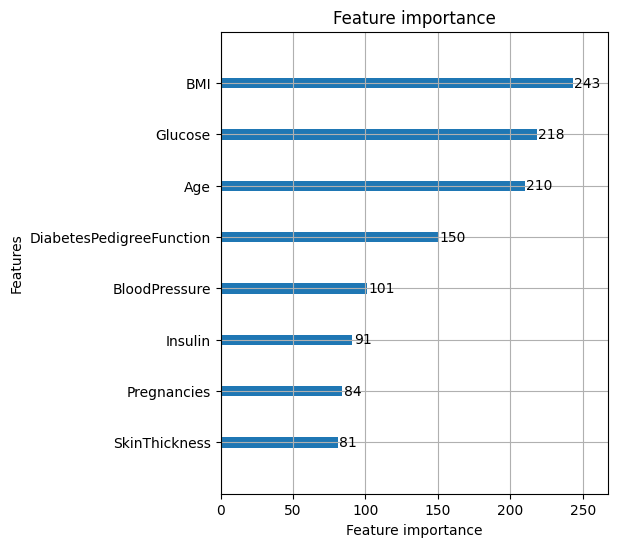

In [11]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,6))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()